You'll be analyzing a dataset that was created by the Beth Israel Deaconness Medical Center in Boston. It contains physiological data (sampled hourly) from patients that were in the hospital's Intensive Care Unit (ICU) (Full dataset description can be found at: https://physionet.org/content/challenge-2019/1.0.0/). It has been used as a benchmark dataset to evaluate the identification of sepsis (https://www.cdc.gov/sepsis/what-is-sepsis.html). Every sample for a patient is labelled as either being Non-Septic (0) or Septic (1). You've been provided with a subset of the total dataset in a directory called "ICU_Visits". 

### Some helpful libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import scipy

### Data Loader

In [3]:
%%time
posSep = {} # dictionary of dataframes that include positive sepsis labels
negSep = {} # dictionary of dataframes that have no positive sepsis labels

for file in os.listdir("ICU_Visits")[0:10000]:
    if file.endswith(".psv"):
        temp = pd.read_csv("ICU_Visits/" + file, sep='|')
        if len(temp.SepsisLabel.unique()) > 1:
            posSep[file] = temp
        else:
            negSep[file] = temp

CPU times: total: 30.4 s
Wall time: 35.9 s


### List of keys for the positive sepsis and negative sepsis dictionaries, respectively

In [6]:
keysSep = list(posSep.keys())
keysNoSep = list(negSep.keys())

The following dataframe is selected from the positive sepsis dictionary. It will be used multiple times during the exercise.

In [7]:
exampleSepticDF = posSep[keysSep[0]] #LB

Display the first 5 rows of the dataframe.

In [8]:
# Answer here
exampleSepticDF.shape[0]

258

What is the shape of exampleSepticDF? How many samples does it have? How many columns does it have?

In [9]:
# Answer here
print("Rows:",exampleSepticDF.shape[0])
print("Columns:",exampleSepticDF.shape[1])

Rows: 258
Columns: 41


Describe the dataframe. How many rows are missing values for HR? How about Temp? How about EtCO2?

In [10]:
exampleSepticDF.isnull().sum()

HR                   20
O2Sat                20
Temp                146
SBP                  20
MAP                  20
DBP                  33
Resp                 20
EtCO2               258
BaseExcess          211
HCO3                237
FiO2                181
pH                  211
PaCO2               211
SaO2                246
AST                 258
BUN                 239
Alkalinephos        258
Calcium             241
Chloride            239
Creatinine          239
Bilirubin_direct    258
Glucose             222
Lactate             234
Magnesium           240
Phosphate           240
Potassium           223
Bilirubin_total     258
TroponinI           258
Hct                 225
Hgb                 231
PTT                 244
WBC                 241
Fibrinogen          252
Platelets           239
Age                   0
Gender                0
Unit1               258
Unit2               258
HospAdmTime           0
ICULOS                0
SepsisLabel           0
dtype: int64

In [11]:
# Answer here
print("Missing for HR:",258 - (exampleSepticDF.get('HR') >0).sum())
print("Missing for Temp:",258 - (exampleSepticDF.get('Temp') >0).sum())
print("Missing for EtCO2:",258 - (exampleSepticDF.get('EtCO2') >0).sum())

Missing for HR: 20
Missing for Temp: 146
Missing for EtCO2: 258


### <span style="color:blue">Q: If the analysis you're performing is unable to handle missing values, what filling/replacement method might you use?</span>

Answer here: Missing values can be replaced with mean values.

Generate a histogram of this dataframe's heart rate values and compare it (visually) to the histogram of the heart rate values in the dataframe created below. If there is a __*density*__ parameter in the function you use, make sure it's set to *False*. 

In [12]:
# Here is the other dataframe to compare to
otherSepticDF = posSep[keysSep[1]]
otherSepticDF

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,81.0,100.0,NaN,NaN,NaN,NaN,12.5,NaN,0.0,22.5,...,NaN,NaN,NaN,65.79,1,NaN,NaN,-0.02,2,0
1,82.0,100.0,38.00,136.5,90.0,71.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,65.79,1,NaN,NaN,-0.02,3,0
2,81.0,100.0,38.11,114.0,87.0,61.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,65.79,1,NaN,NaN,-0.02,4,0
3,82.0,100.0,NaN,114.0,79.0,62.0,12.0,NaN,NaN,24.0,...,12.5,NaN,225.0,65.79,1,NaN,NaN,-0.02,5,0
4,84.0,100.0,NaN,117.0,79.0,61.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,65.79,1,NaN,NaN,-0.02,6,0
5,84.0,100.0,NaN,103.0,73.5,58.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,65.79,1,NaN,NaN,-0.02,7,0
6,85.0,100.0,38.17,123.0,72.0,66.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,65.79,1,NaN,NaN,-0.02,8,0
7,85.0,100.0,NaN,143.0,96.0,72.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,65.79,1,NaN,NaN,-0.02,9,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,65.79,1,NaN,NaN,-0.02,10,0
9,79.0,100.0,NaN,146.0,93.0,63.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,65.79,1,NaN,NaN,-0.02,11,0


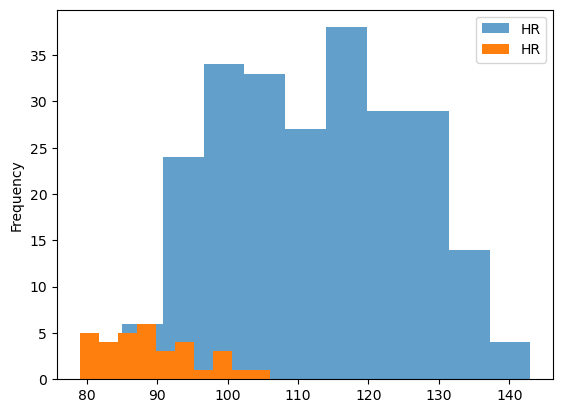

In [13]:
# Generate superimposed histograms here
ax = exampleSepticDF.plot(kind="hist",y='HR',alpha=.7);
otherSepticDF.plot(ax=ax,kind='hist',y='HR');

Now generate the same pair of histograms but this time set the __**density**__ parameter to *True*. 

### <span style="color:blue">Q: What is the difference between this new plot and the one prior? How has your interpretation of data changed?

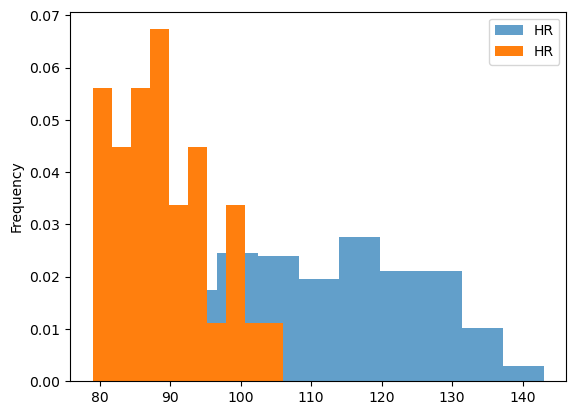

In [14]:
# Generate density-based superimposed histograms here
ax = exampleSepticDF.plot(kind="hist",y='HR',alpha=.7,density=True);
otherSepticDF.plot(ax=ax,kind='hist',y='HR',density=True);

Now combine all dataframes of septic patients into a single dataframe and display the first 5 rows ...

In [15]:
amalgamSeptic = pd.DataFrame()
for key in keysSep:
    # Answer here
    # amalgamSeptic = amalgamSeptic.concat(posSep[key])
    amalgamSeptic = pd.concat([amalgamSeptic,posSep[key]])
    
amalgamSeptic.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,1,0
1,117.0,99.0,NaN,116.0,97.0,81.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,2,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.0,23.0,...,8.9,124.0,64.0,27.92,1,NaN,NaN,-0.03,3,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,NaN,...,3.9,180.0,114.0,27.92,1,NaN,NaN,-0.03,4,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,5,0


... and all dataframes of non-septic patients into a separate dataframe and display the first 5 rows.

In [16]:
amalgamNonSeptic = pd.DataFrame()
for key in keysNoSep[:len(keysSep)*2]:
    # Answer here
    amalgamNonSeptic = pd.concat([amalgamNonSeptic,negSep[key]])
    
amalgamNonSeptic.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


Drop all rows in the sepsis dataframe that have *SepsisLabel == 0* and store that structure as a new dataframe. Then, visualize and statistically compare (i.e., report *p* value in the title) the kernel density estimations (KDEs) of the following physiological features between the septic and non-septic dataframes: *HR, O2Sat, Temp, SBP, MAP, DBP, Resp*.

In [17]:
# Answer here

nonzero_amalgamSeptic = amalgamSeptic[amalgamSeptic.get('SepsisLabel') != 0]
features = ['O2Sat','Temp','SBP','MAP','DBP','Resp']

In [18]:
scipy.stats.gaussian_kde(nonzero_amalgamSeptic['HR'].dropna());

In [19]:
# from sklearn.neighbors import KernelDensity
# kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(nonzero_amalgamSeptic['HR'].dropna())
# kde.score_samples(nonzero_amalgamSeptic['HR'].dropna())

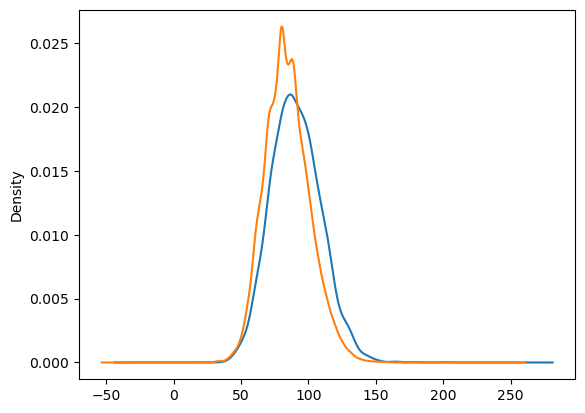

In [20]:
ax = nonzero_amalgamSeptic['HR'].dropna().plot.kde();

#for feature in features:
    #nonzero_amalgamSeptic[feature].dropna().plot.kde();

ax2 = amalgamNonSeptic['HR'].dropna().plot.kde();

#for feature in features:
    #amalgamNonSeptic[feature].dropna().plot.kde()

In [21]:
feature_comparison = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp']

for each in feature_comparison:
    print("T-Test for",each,":",stats.ttest_ind(a=nonzero_amalgamSeptic.get(each).dropna(), b=amalgamNonSeptic.get(each).dropna(), equal_var=False))

T-Test for HR : TtestResult(statistic=27.701677212438703, pvalue=7.545894400965857e-162, df=8579.95669131404)
T-Test for O2Sat : TtestResult(statistic=-4.107499759025655, pvalue=4.037200962346395e-05, df=8489.453196242132)
T-Test for Temp : TtestResult(statistic=14.480350375052591, pvalue=8.313929552346954e-46, df=2675.8399950275607)
T-Test for SBP : TtestResult(statistic=2.6534655516682704, pvalue=0.00798381150244404, df=7489.096313068236)
T-Test for MAP : TtestResult(statistic=2.0402845279993103, pvalue=0.04135210950085327, df=8705.076464619558)
T-Test for DBP : TtestResult(statistic=6.613003357009573, pvalue=4.1024779757012403e-11, df=5811.138442574272)
T-Test for Resp : TtestResult(statistic=30.364968555694848, pvalue=3.299669139240464e-192, df=8358.01005939531)


### <span style="color:blue">Q: Describe the reason behind your choice of statistical test.

Answer: T test would be the statistical test of choice as it compares statistical and numerical values. The features being measured are numerical, so a t test would be best in this case.

### <span style="color:blue">Q: What are some takeaways from this analysis? How much information does the p-value really provide? From these features, how confident are you that you'd be able to tell a septic sample from a non-septic sample? Are you able to determine relationships *between* features with this analysis?

Answer: From the analysis, we can see that the data between the septic and non-septic dataframes are significantly different when it comes to the features of HR, O2Sat, Temp, SBP, MAP, DBP, Resp. The p-value is under .05 for the t tests for all of the features. I would not be able to tell a septic sample from a non-septic sample because the I do not know how the data for each dataframe should look like. I only know that the data is statistically different. From the t test analysis, I cannot determine any relationships between features.

Plot the heart rate over time of the original septic example (*exampleSepticDF*). Now plot the sepsis label over time on the same figure, but use a different y-axis. 

In [22]:
exampleSepticDF[exampleSepticDF.get('SepsisLabel') == 1]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
248,119.0,100.0,37.94,140.0,106.0,85.0,26.5,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,249,1
249,118.0,96.0,NaN,138.0,108.0,88.0,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,250,1
250,111.0,97.0,37.39,136.0,106.0,86.0,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,251,1
251,116.0,96.0,37.72,143.0,109.0,88.0,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,252,1
252,120.0,97.0,NaN,138.0,106.0,85.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,253,1
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,254,1
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,255,1
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,256,1
256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25.0,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,257,1
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,258,1


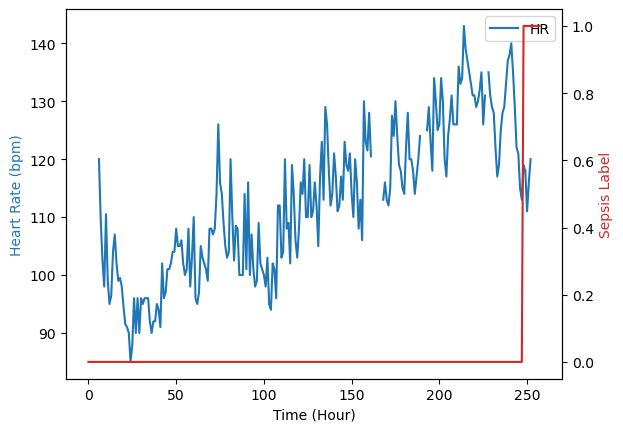

In [23]:
# Answer here
ax1 = exampleSepticDF.plot(kind='line',y='HR');
plt.xlabel('Time (Hour)');
plt.ylabel('Heart Rate (bpm)', color='tab:blue');
plt.legend(['HR','Sepsis Label']);

ax2 = ax1.twinx()
sepsis_moving_average = exampleSepticDF.get('SepsisLabel')

ax2.plot(sepsis_moving_average,color = 'tab:red');
ax2.set_ylabel('Sepsis Label',color = 'tab:red');

Plot the same features but this time apply a moving average with a window size of 12 hours to both heart rate and sepsis label.

In [22]:
data_length = np.arange(1,13)

In [24]:
exampleSepticDF

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,1,0
1,117.0,99.0,NaN,116.0,97.0,81.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,2,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.0,23.0,...,8.9,124.0,64.0,27.92,1,NaN,NaN,-0.03,3,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,NaN,...,3.9,180.0,114.0,27.92,1,NaN,NaN,-0.03,4,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,254,1
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,255,1
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,256,1
256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25.0,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,257,1


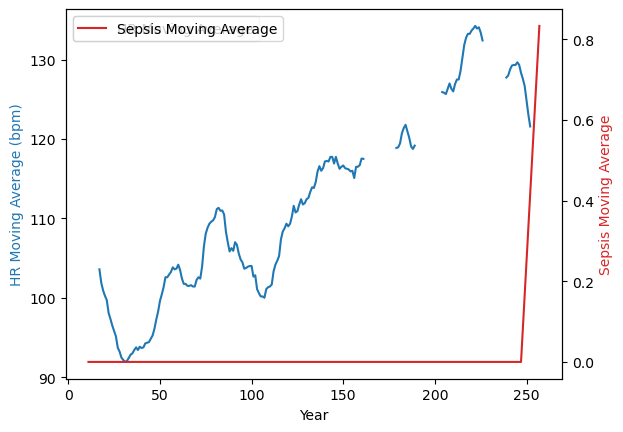

In [31]:
moving_average_df = exampleSepticDF.copy()

moving_average_df['hr_moving_average'] = moving_average_df['HR'].rolling(window=12).mean()
moving_average_df['sepsis_moving_average'] = moving_average_df['SepsisLabel'].rolling(window=12).mean()

ax1 = moving_average_df.plot(kind='line', y='hr_moving_average', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('HR Moving Average (bpm)', color='tab:blue')
ax1.legend(['HR Moving Average'])

ax2 = ax1.twinx()
ax2.plot(moving_average_df['sepsis_moving_average'], color='tab:red')
ax2.set_ylabel('Sepsis Moving Average', color='tab:red')


ax2.legend(['Sepsis Moving Average'])


plt.show()

### <span style="color:blue">Q: What did this process do to the data? Is it possible to reconstruct the original heart rate data after performing a moving average? Does it make sense to apply a moving average to the sepsis label data? Why or why not?

Answer: Applying a moving average to the data gives the overall trend to the data and how each additional hour affects the heart rate. The original heart rate data could not be reconstructed. Applying a moving average to the sepsis label does not make sense because the label number is a categorical variable to determine whether or not the patient has sepsis. Performing statistical analysis on this value does not constitute to anything important.

### <span style="color:blue">Q: Is there a trend over the whole stay leading up to a positive sepsis label? Does it change smoothly or does it change jaggedly? Describe heart rate immediately prior to sepsis. 

Answer: Heart rate seems to be increasing, but then starts to decrease when leading up to a positive sepsis label. It changes jaggedly. Immediately prior to sepsis, the heart rate takes an immediate dip. Patterns earlier in the data display that heart rate decrease are normal, however, the dip prior to sepsis is an extreme dip that does not increase again until it is clear that the patient is positive for Sepsis.

Combine the two dataframes you used for the KDE comparison.

In [32]:
# Answer here

combined = pd.concat([nonzero_amalgamSeptic,amalgamNonSeptic])
combined

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
248,119.0,100.0,37.94,140.0,106.0,85.0,26.5,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,249,1
249,118.0,96.0,NaN,138.0,108.0,88.0,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,250,1
250,111.0,97.0,37.39,136.0,106.0,86.0,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,251,1
251,116.0,96.0,37.72,143.0,109.0,88.0,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,252,1
252,120.0,97.0,NaN,138.0,106.0,85.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.92,1,NaN,NaN,-0.03,253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,113.0,100.0,37.00,141.0,87.0,58.0,20.0,NaN,NaN,22.0,...,70.6,NaN,NaN,72.91,0,NaN,NaN,-4.15,44,0
44,110.0,100.0,NaN,151.0,91.0,60.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,72.91,0,NaN,NaN,-4.15,45,0
45,121.0,98.0,NaN,115.0,76.0,55.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,72.91,0,NaN,NaN,-4.15,46,0
46,118.0,99.0,36.92,108.0,73.0,54.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,72.91,0,NaN,NaN,-4.15,47,0


In [33]:
from sklearn.decomposition import PCA

Select the following columns from the combined dataframe and store them in a new dataframe: *HR, O2Sat, Temp, SBP, MAP, DBP, Resp, SepsisLabel*

Be sure to drop any row that contains a missing value.

In [34]:
# Answer here
new_combined = combined[['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','SepsisLabel']]
new_combined

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,SepsisLabel
248,119.0,100.0,37.94,140.0,106.0,85.0,26.5,1
249,118.0,96.0,NaN,138.0,108.0,88.0,26.0,1
250,111.0,97.0,37.39,136.0,106.0,86.0,26.0,1
251,116.0,96.0,37.72,143.0,109.0,88.0,30.0,1
252,120.0,97.0,NaN,138.0,106.0,85.0,32.0,1
...,...,...,...,...,...,...,...,...
43,113.0,100.0,37.00,141.0,87.0,58.0,20.0,0
44,110.0,100.0,NaN,151.0,91.0,60.0,23.0,0
45,121.0,98.0,NaN,115.0,76.0,55.0,15.0,0
46,118.0,99.0,36.92,108.0,73.0,54.0,20.0,0


In [35]:
new_combined = new_combined.dropna()

Create a separate data structure that keeps track of the *SepsisLabel* column (the rest of the columns are features/dimensions you'll use). Store the rest of the columns in a different data structure and normalize (zscore) the dataframe column-wise. 

In [36]:
# Answer here

sepsis_label = new_combined["SepsisLabel"]
sepsis_label

248    1
250    1
251    1
30     1
128    1
      ..
31     0
35     0
39     0
43     0
46     0
Name: SepsisLabel, Length: 13927, dtype: int64

In [37]:
other_columns = new_combined[['HR','O2Sat','Temp','SBP','MAP','DBP','Resp']]
other_columns

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp
248,119.0,100.0,37.94,140.0,106.0,85.0,26.5
250,111.0,97.0,37.39,136.0,106.0,86.0,26.0
251,116.0,96.0,37.72,143.0,109.0,88.0,30.0
30,90.0,100.0,37.17,140.0,85.0,59.0,18.0
128,101.0,93.0,37.78,108.0,65.0,59.0,21.0
...,...,...,...,...,...,...,...
31,101.0,99.0,36.72,107.0,71.0,51.0,17.0
35,105.0,100.0,36.94,102.0,68.0,49.0,16.5
39,112.0,100.0,37.00,102.0,70.0,52.0,23.5
43,113.0,100.0,37.00,141.0,87.0,58.0,20.0


In [38]:
from scipy.stats import zscore

In [39]:
normalized = other_columns.apply(zscore)
normalized.reset_index(drop=True)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp
0,2.097687,0.815247,1.002680,1.086333,2.002356,2.212546,1.550349
1,1.573942,-0.210542,0.313113,0.887624,2.002356,2.296648,1.456506
2,1.901283,-0.552471,0.726853,1.235364,2.213203,2.464854,2.207251
3,0.199110,0.815247,0.037286,1.086333,0.526426,0.025873,-0.044984
4,0.919260,-1.578260,0.802079,-0.503334,-0.879222,0.025873,0.518075
...,...,...,...,...,...,...,...
13922,0.919260,0.473317,-0.526905,-0.553011,-0.457528,-0.646949,-0.232671
13923,1.181133,0.815247,-0.251078,-0.801397,-0.668375,-0.815154,-0.326514
13924,1.639410,0.815247,-0.175853,-0.801397,-0.527810,-0.562846,0.987290
13925,1.704878,0.815247,-0.175853,1.136010,0.666991,-0.058229,0.330388


Keep track of the dataframe indices of positive sepsis samples and negative sepsis samples.

In [40]:
# Answer here
positive_indices = sepsis_label[sepsis_label > 0].index
positive_indices

Index([248, 250, 251,  30, 128, 129, 130, 133,  22,  26,
       ...
         5,   6,   7,   7,   3,   3,   7,   4,   5,   6],
      dtype='int64', length=1574)

In [41]:
negative_indices = sepsis_label[sepsis_label == 0].index
negative_indices

Index([ 1,  5,  9, 14,  6,  7, 10, 12, 14, 18,
       ...
       23,  7, 11, 15, 28, 31, 35, 39, 43, 46],
      dtype='int64', length=12353)

Perform Principal Component Analysis (PCA) on your zscored dataframe (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [42]:
import sklearn

In [43]:
# Answer here
sklearn.decomposition.PCA(normalized)

PCA(n_components=           HR     O2Sat      Temp       SBP       MAP       DBP      Resp
248  2.097687  0.815247  1.002680  1.086333  2.002356  2.212546  1.550349
250  1.573942 -0.210542  0.313113  0.887624  2.002356  2.296648  1.456506
251  1.901283 -0.552471  0.726853  1.235364  2.213203  2.464854  2.207251
30   0.199110  0.815247  0.037286  1.086333  0.526426  0.025873 -0.044984
128  0.919260 -1.578260  0.802079 -0.503334 -0.879222  0.025873  0.518075
..        ...       ...       ...       ...       ...       ...       ...
31   0.919260  0.473317 -0.526905 -0.553011 -0.457528 -0.646949 -0.232671
35   1.181133  0.815247 -0.251078 -0.801397 -0.668375 -0.815154 -0.326514
39   1.639410  0.815247 -0.175853 -0.801397 -0.527810 -0.562846  0.987290
43   1.704878  0.815247 -0.175853  1.136010  0.666991 -0.058229  0.330388
46   2.032219  0.473317 -0.276154 -0.503334 -0.316963 -0.394641  0.330388

[13927 rows x 7 columns])

Plot the cumulative sum of the explained variance ratio vs. PC number. How much variance in the data is explained by the first two principal components?

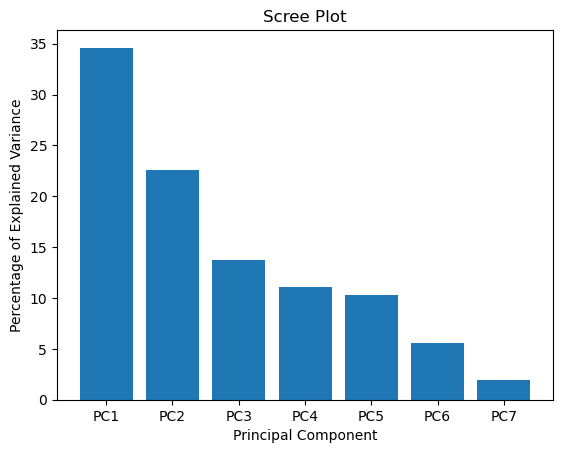

In [45]:
# Answer here
pca = PCA()
pca.fit(normalized)
pca_data = pca.transform(normalized)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# About 57% (34+23) of the variance in the data is explained by the first two principal components.

In [46]:
pca_data.shape

(13927, 7)

Scatterplot the first two principal components of the non-septic samples, then plot the same principal components of the septic samples. 

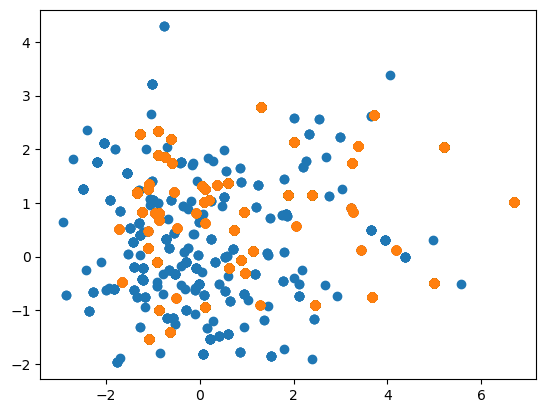

In [47]:
# Answer here
pca_2c = PCA(n_components=2)
#X_pca_2c = pca_2c.fit_transform(StandardScaler().fit_transform(nonzero_amalgamSeptic.dropna()))

pca_data_positive = pca_data[positive_indices,:]
pca_data_positive[:,0]
plt.scatter(pca_data_positive[:,0],pca_data_positive[:,1]);

pca_data_negative = pca_data[negative_indices,:]
pca_data_negative[:,0]
plt.scatter(pca_data_negative[:,0],pca_data_negative[:,1]);